In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset (1).csv")

In [13]:
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Numerical Columns**

In [15]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**Categorical Columns**

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Finding missing_values**

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


#**Fixing missing values in age column**

In [18]:
# Count of missing values for males
df.loc[df['Sex'] == 'male' , 'Age'].isnull().sum()

np.int64(124)

In [19]:
# Count of missing values for females
df.loc[df['Sex'] == 'female' , 'Age'].isnull().sum()

np.int64(53)

In [20]:
# Calculate Mean Age for males
df.loc[df['Sex'] == 'male' , 'Age'].mean()

np.float64(30.72664459161148)

In [21]:
df.loc[df['Sex'] == 'female' , 'Age'].mean()

np.float64(27.915708812260537)

In [22]:
df['Age'].isnull().sum()

np.int64(177)

In [23]:
# Imputting missing values for age
df['Age'] = df['Age'].fillna(df.apply(lambda row: 30 if row['Sex'] == 'male' else 27,axis=1))

In [24]:
df['Age'].isnull().sum()

np.int64(0)

#**Fixing missing values for embarked**

In [25]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [26]:
df['Embarked'].fillna('S', inplace=True)

<ipython-input-26-6ad30875ebf2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [27]:
df['Embarked'].isnull().sum()

np.int64(0)

#**Univariate Analysis**
**1️. Numerical Columns**

- PassengerId

- Survived

- Pclass

- Age

- SibSp

- Parch

- Fare




-----------------------------------------

##**1. Age Column**

In [28]:
# Descriptive statistics
df['Age'].describe()

,Age
count,891.000000
mean,29.580438
std,13.018631
min,0.420000
25%,22.000000
50%,30.000000
75%,35.000000
max,80.000000


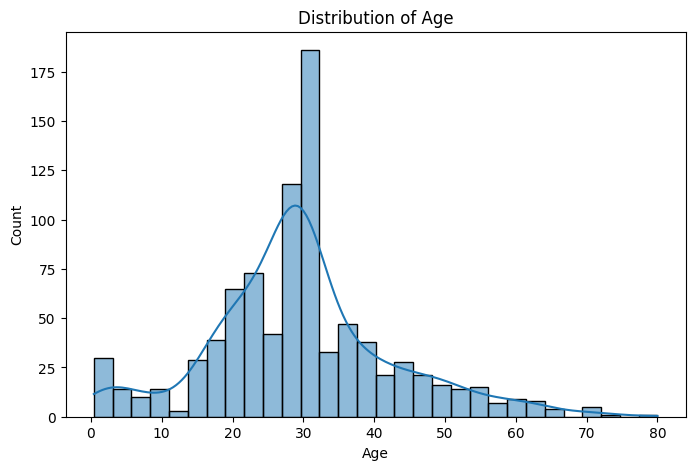

In [29]:
#visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True ,bins=30)
plt.title("Distribution of Age")
plt.show()

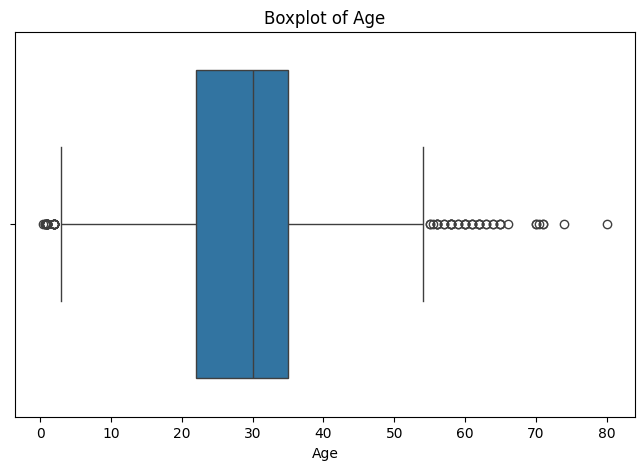

In [30]:
#Identifying Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

In [31]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])
print("People with age between 0 and 1 are",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
People with age between 0 and 1 are 7


In [32]:
#skewness
df['Age'].skew()

np.float64(0.4597071905630148)

In [33]:
#kurtosis
df['Age'].kurt()

np.float64(0.9624650230618057)

##**2. Fare column**

In [34]:
# Descriptive statistics
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


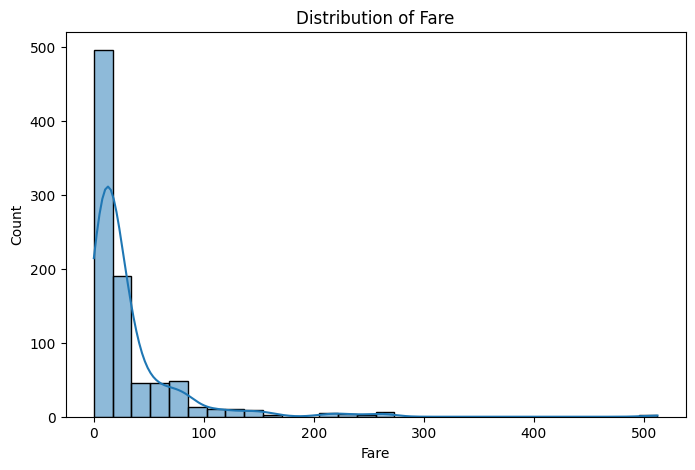

In [35]:
#Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Distribution of Fare")
plt.show()

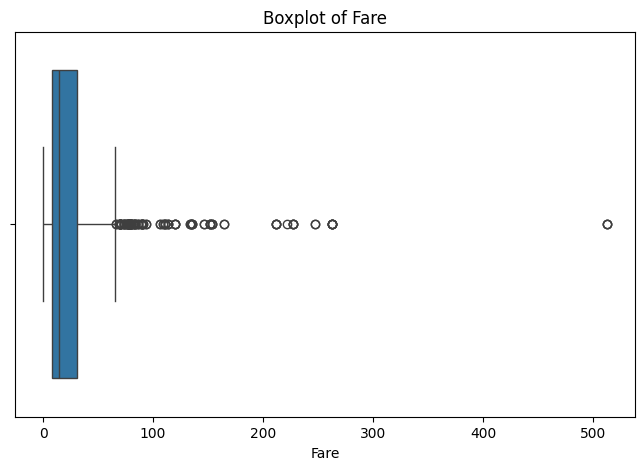

In [36]:
#Identifying Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

In [37]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


In [38]:
#Skewness
df['Fare'].skew()

np.float64(4.787316519674893)

In [39]:
#kurtosis
df['Fare'].kurt()

np.float64(33.39814088089868)

##**3.SibSP column**

In [40]:
# Descriptive statistics
df['SibSp'].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


In [41]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


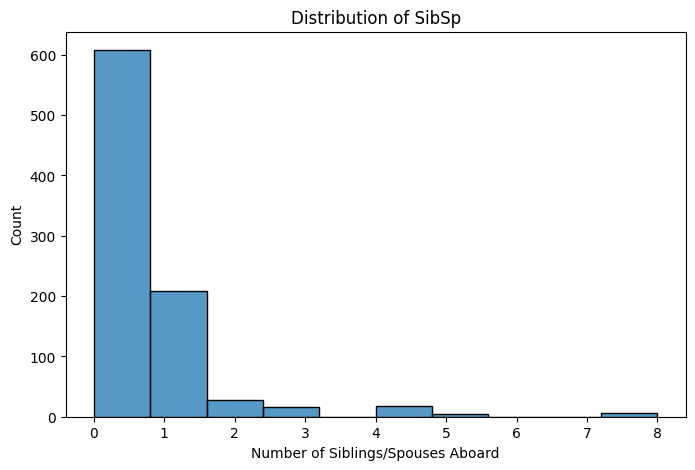

In [42]:
#visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['SibSp'], bins=10, kde=False)
plt.title("Distribution of SibSp")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Count")
plt.show()


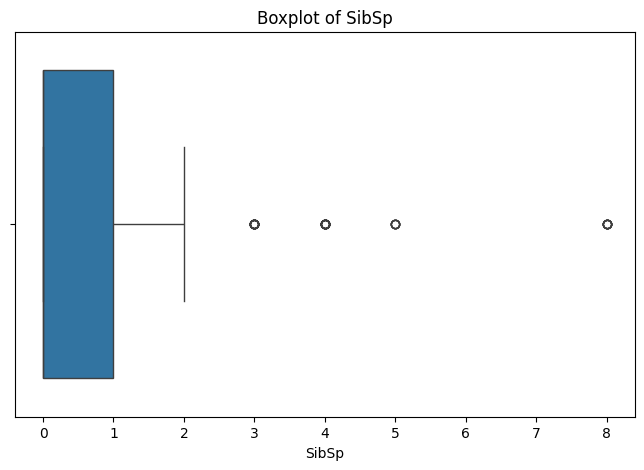

In [43]:
#outliers detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SibSp'])
plt.title("Boxplot of SibSp")
plt.show()


In [44]:
#skewness
df['SibSp'].skew()

np.float64(3.6953517271630565)

In [45]:
#kurtosis
df['SibSp'].kurt()

np.float64(17.880419726645968)

##**4. Parch column**


In [46]:
# Descriptive statistics
df['Parch'].describe()

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


In [47]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


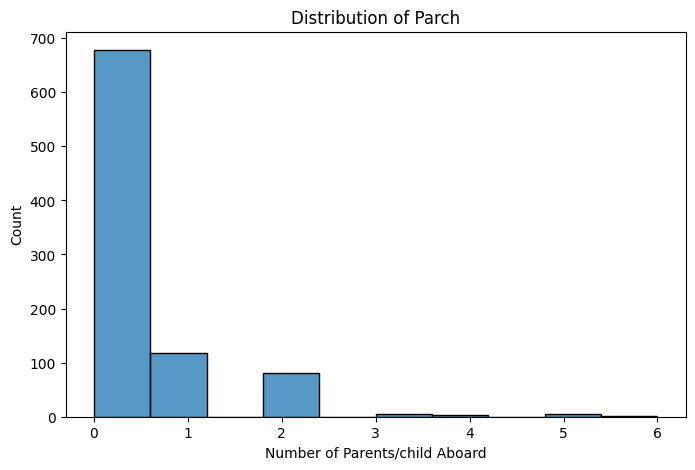

In [48]:
#visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['Parch'], bins=10, kde=False)
plt.title("Distribution of Parch")
plt.xlabel("Number of Parents/child Aboard")
plt.ylabel("Count")
plt.show()

In [49]:
#skewness
df['Parch'].skew()

np.float64(2.7491170471010933)

In [50]:
#kurtosis
df['Parch'].kurt()

np.float64(9.778125179021648)

#**2.Categorical Columns**

- Name

- sex

- Embarked

- Ticket

- Cabin

-----------------------------------------

##**1. Survived column**

In [51]:
# Descriptive statistics
df['Survived'].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


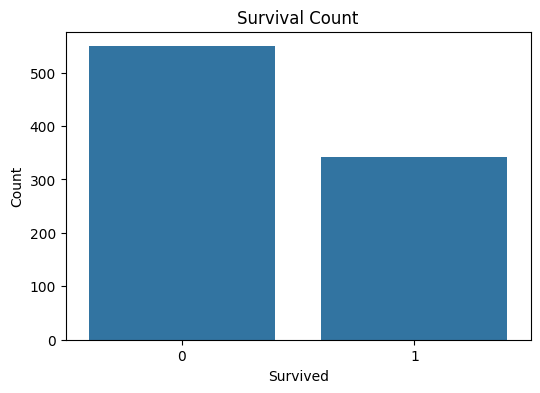

In [52]:
# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.ylabel("Count")
plt.show()


In [53]:
#counclusion
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


##**2. Pclass**

In [54]:
# Descriptive statistics
df['Pclass'].describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [55]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


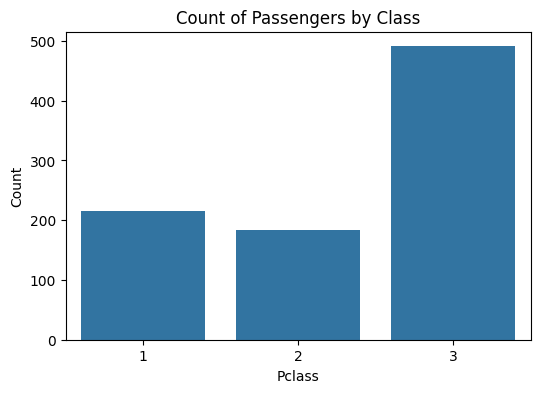

In [56]:
# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title("Count of Passengers by Class")
plt.ylabel("Count")
plt.show()


##**3. Sex**

In [57]:
# Descriptive statistics
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


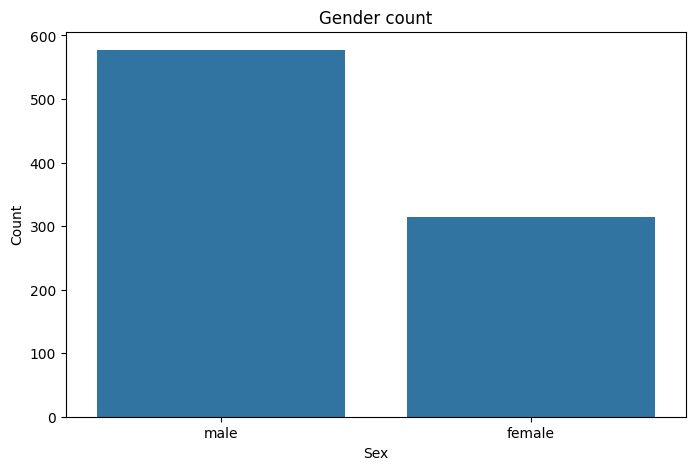

In [58]:
#visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title("Gender count")
plt.ylabel("Count")
plt.show()

##**4. Embarked**

In [59]:
# Descriptive statistics
df['Embarked'].value_counts()


,count
Embarked,
S,646
C,168
Q,77


In [60]:
df['Embarked'].value_counts()/891*100

,count
Embarked,
S,72.502806
C,18.855219
Q,8.641975


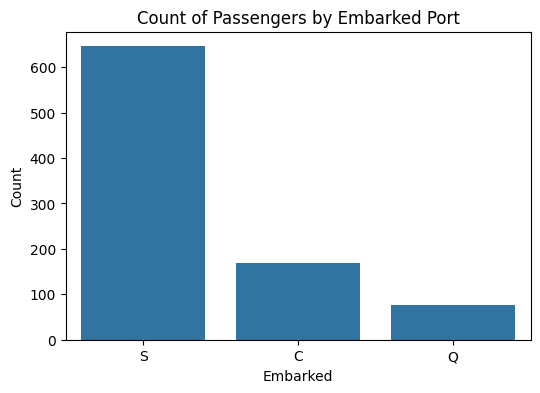

In [61]:
# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title("Count of Passengers by Embarked Port")
plt.ylabel("Count")
plt.show()


#**Bivariate Analysis**
#**1. Numerical to Numerical**


#**Age vs Fare**

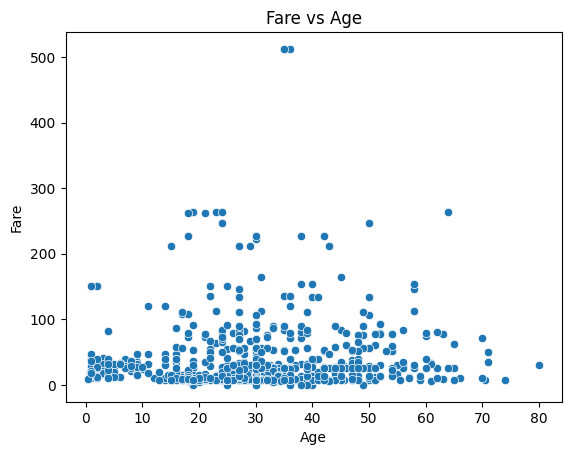

In [62]:
#visualization
sns.scatterplot(data = df,x ='Age', y='Fare')
plt.title("Fare vs Age")
plt.show()

#**SibSp vs Parch**

In [63]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


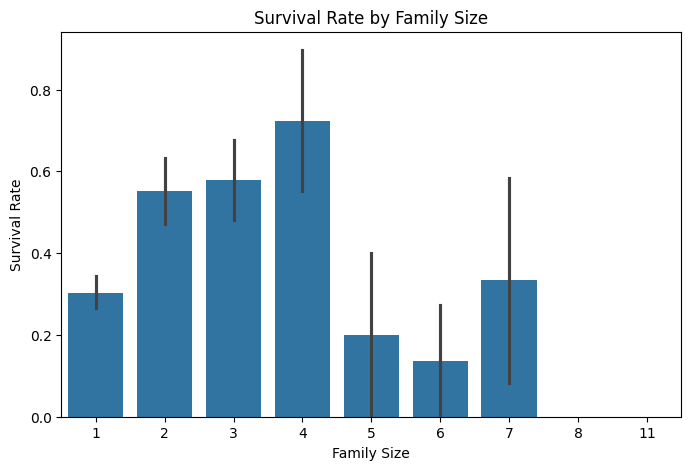

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df , x='FamilySize', y='Survived')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


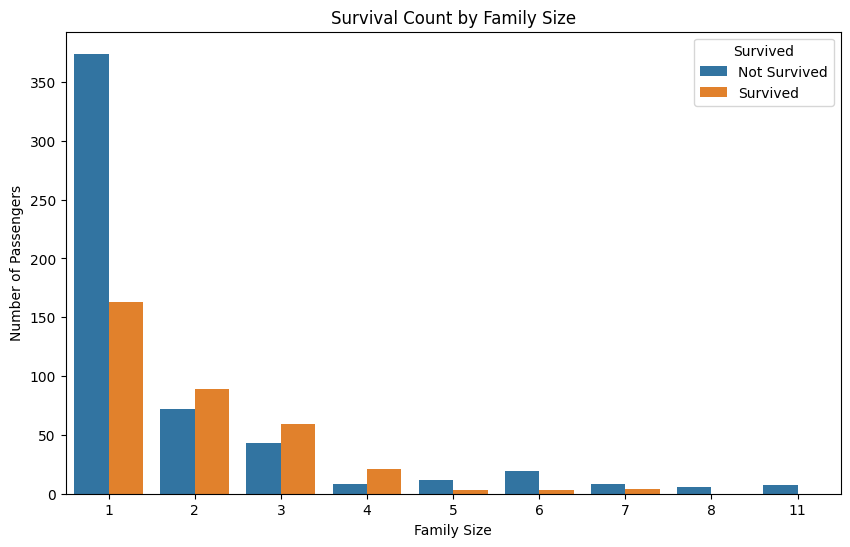

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival Count by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()


#**2.Numerical to Categorical**

#**Age vs Survived**

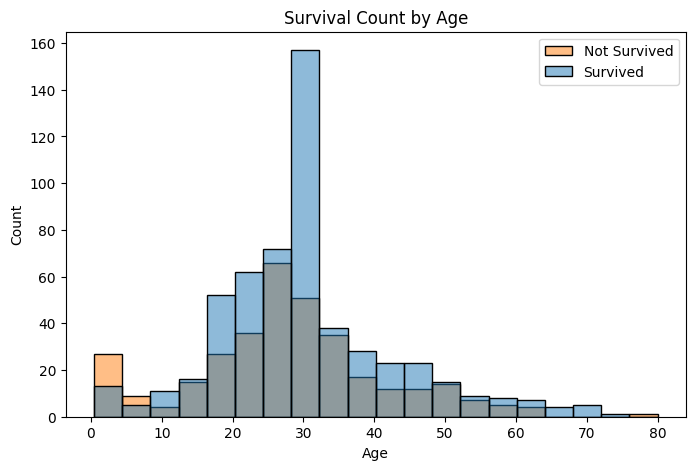

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=20,kde=False)

plt.title("Survival Count by Age")
plt.legend(["Not Survived", "Survived"])
plt.show()


#**Pclass vs Survived**

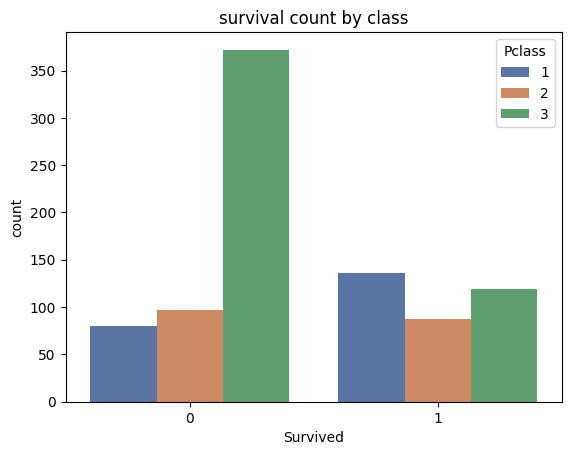

In [67]:
sns.countplot(x='Survived', hue='Pclass', data=df , palette="deep")
plt.title("survival count by class")
plt.show()

#**Fare vs Survived**

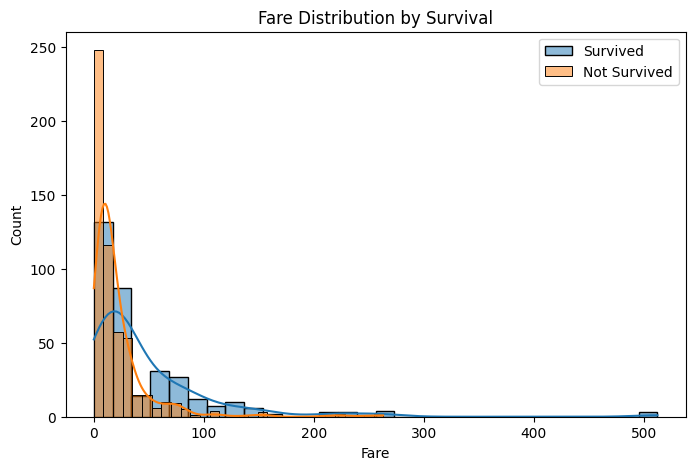

In [68]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Survived'] == 1]['Fare'], bins=30, label="Survived", kde=True)
sns.histplot(df[df['Survived'] == 0]['Fare'], bins=30,  label="Not Survived", kde=True)
plt.title("Fare Distribution by Survival")
plt.legend()
plt.show()


#**Parch vs Survived**

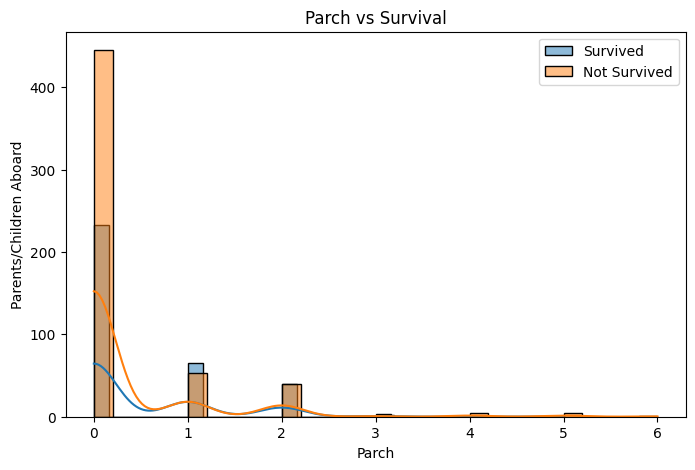

In [69]:
plt.figure(figsize=(8, 5))
sns.histplot(df.loc[df['Survived'] == 1, 'Parch'], bins=30, label="Survived",kde = True)
sns.histplot(df.loc[df['Survived'] == 0, 'Parch'], bins=30,  label="Not Survived",kde=True)
plt.title("Parch vs Survival")
plt.ylabel("Parents/Children Aboard")
plt.legend()
plt.show()


#**SibSp vs Survived**

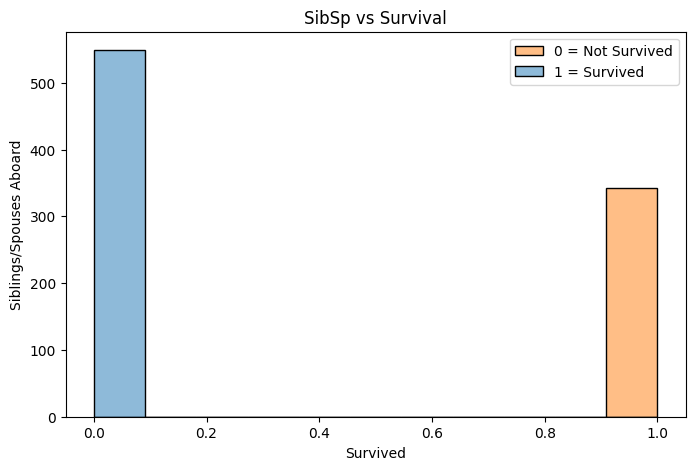

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df,x='Survived',hue='Survived')
plt.title("SibSp vs Survival")
plt.xlabel("Survived")
plt.ylabel("Siblings/Spouses Aboard")
plt.legend(labels=["0 = Not Survived","1 = Survived"])
plt.show()


#**3. Pclass vs Sex**

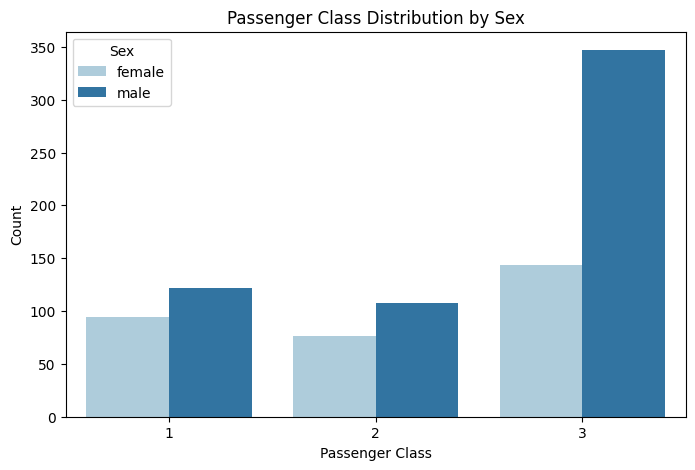

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x='Pclass', hue='Sex', palette='Paired')
plt.title("Passenger Class Distribution by Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


#**3. Categorical to Categorical**

#**1.Sex vs Survived**

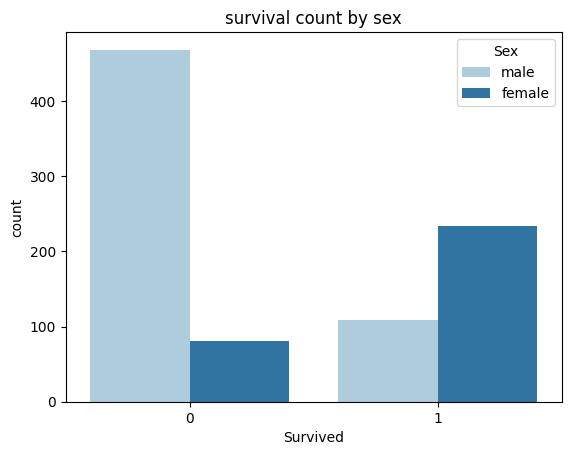

In [72]:
#visualization
sns.countplot(x='Survived', hue='Sex', data=df,palette = "Paired")
plt.title("survival count by sex")
plt.show()

#**2.Embarked vs Survived**

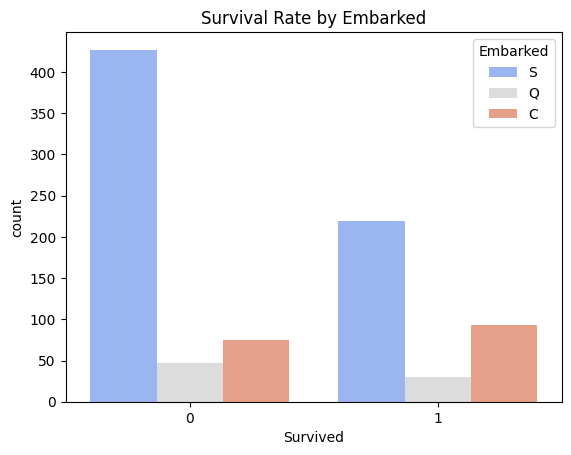

In [73]:
#visualizatuion
sns.countplot(data = df , x='Survived', hue='Embarked',palette="coolwarm")
plt.title("Survival Rate by Embarked")
plt.show()

#**3.Pclass vs Survived**

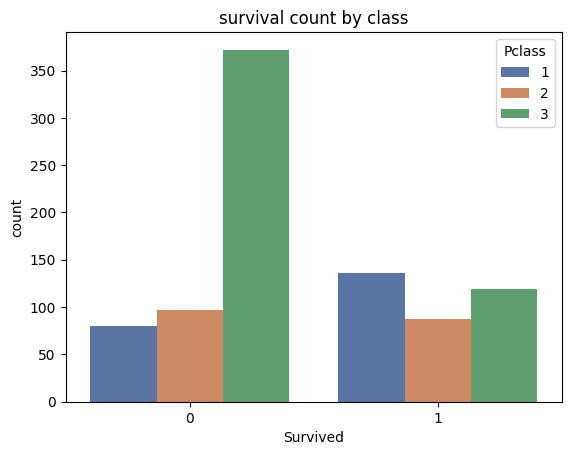

In [74]:
sns.countplot(x='Survived', hue='Pclass', data=df , palette="deep")
plt.title("survival count by class")
plt.show()

#**4. Pclass vs Sex**

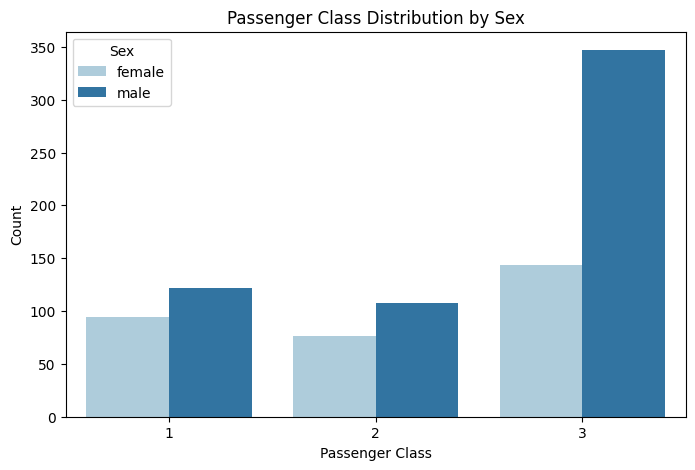

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x='Pclass', hue='Sex', palette='Paired')
plt.title("Passenger Class Distribution by Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()
